 In this case, since you have a multi-class classification problem with a relatively small number of instances (366) and a moderate number of attributes (34), you might want to start by trying out a few simple algorithms such as 
 #### logistic regression, decision trees, and random forests. 
 These algorithms are relatively fast to train and easy to implement, so you can quickly get a sense of how well they perform on your data.

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(2)


In [380]:
df = pd.read_csv('data/dermatology_csv.csv')

In [378]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [381]:
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

# Data Preprocessing

Data Cleaning

In [188]:
# Checking and handling the null values in the dataset
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

`report`

It can be observed from the provided result that there are no null values aside `age`, present in the dataset. This means that no further action needs to be taken in regards to handling null values. This is a beneficial aspect, as the absence of null values allows for the analysis to be conducted without the need to consider missing values.

data preprocessing

In [189]:
# #  Search for '?' in the 'Age' column
# missing_values = df[df['age'] == '?']

# # Print the number of missing values
# print(f"Number of missing values: {len(missing_values)}")

According to the data description, there are 8 missing values in the Age attribute, which are denoted by '?'. However, since there are more than 8 entries in the dataset, dropping these rows will not significantly impact the analysis and modeling.

In [190]:
df.dropna(inplace=True)

In [191]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [192]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [193]:
# hold the dataframe
# df_temp = df.copy()

In [194]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')

In [200]:
actual_class_names = ['psoriasis' ,'seboreic dermatitis',  'lichen planus', 'pityriasis rosea', 'cronic dermatitis'
                        ,'pityriasis rubra pilaris']

In [204]:
index_to_cn = dict( enumerate(actual_class_names))

In [222]:
dict_cn = {1: 'psoriasis',
 2: 'seboreic dermatitis',
 3: 'lichen planus',
 4: 'pityriasis rosea',
 5: 'cronic dermatitis',
 6: 'pityriasis rubra pilaris'}

In [223]:
df['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [224]:
df['classNames'] = df['class'].apply(lambda x: dict_cn[x])

# EDA

In [225]:
derm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [226]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.379888,0.622905,0.530726,...,0.474860,0.460894,0.949721,0.458101,0.106145,0.117318,1.877095,0.558659,36.296089,2.782123
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.837388,0.990278,0.912352,...,0.871705,0.959914,1.129060,0.959796,0.455180,0.493863,0.699324,1.107990,15.324557,1.593936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


frequency distribution

In [227]:
df['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

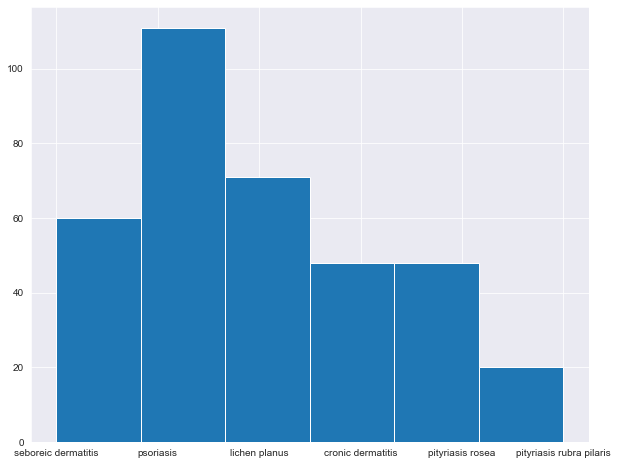

<Figure size 432x288 with 0 Axes>

In [229]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.hist(x=df['classNames'], bins=6)
plt.show()
plt.tight_layout()

The class value distribution in the dataset was analyzed and it was found that the most frequent class value was psoriasis (1), with 112 instances, followed by lichen planus (3) with 72 instances, seboreic dermatitis (2) with 61 instances, and pityriasis rubra pilaris (6) with the lowest number of instances.

<!-- The distribution of the class values in the dataset was examined. It appears that the most common class value is 1, with 112 instances, followed by class 3 with 72 instances, class 2 with 61 instances, and so on.

The balance of the different class values in the dataset can be understood through this information. For example, if there is a significant imbalance in the dataset, with one or a few class values greatly outnumbering the others, it could potentially affect the performance of our machine learning model.

 -->

the distribution of class values among the dataset rows

correlation matrix

<AxesSubplot:>

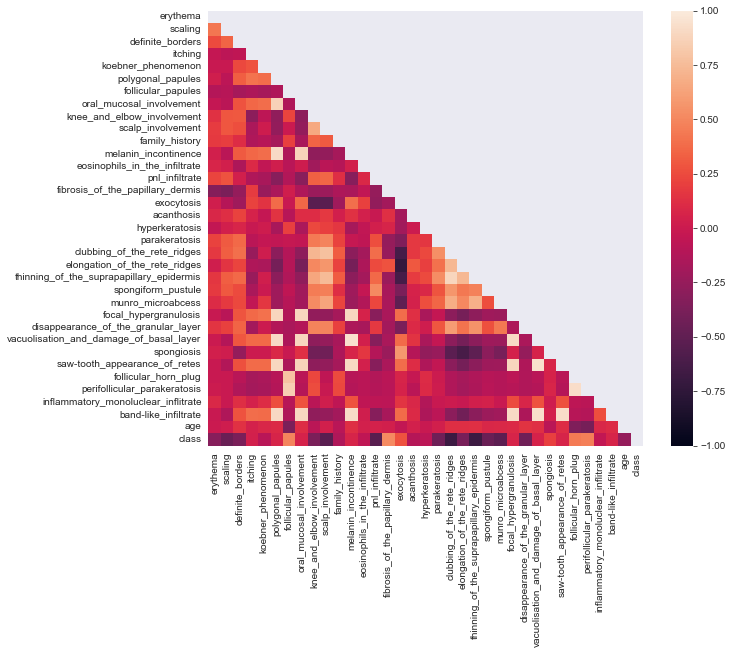

In [151]:
corr_matrix = df.corr()

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, )


A strong positive or negative relationship is observed between some attributes, while a weaker or no relationship is observed between other attributes. For example, scaling and erythema have a strong positive relationship (0.435467), while fibrosis_of_the_papillary_dermis and scalp_involvement have a weaker or no relationship (0.073488).

Also, the relationship between some attributes and the class is strong, while others have a weaker or no relationship. A strong negative relationship is observed between the attribute erythema and the class (-0.335537), while the attribute fibrosis_of_the_papillary_dermis has a weaker or no relationship (-0.084227).

The relationship between some attributes and the class differs from their relationship with each other. For instance, scaling and erythema have a strong positive relationship with one another (0.435467), but a negative relationship with the class (-0.335537 and -0.468688, respectively).

And lastly, some attributes are correlated with multiple other attributes, while others are only correlated with a few. The attribute erythema is correlated with several other attributes (such as scaling, definite_borders, and itching), while the attribute disappearance_of_the_granular_layer is only correlated with a few other attributes (such as fibrosis_of_the_papillary_dermis and vacuolisation_and_damage_of_basal_layer).

Scatter plots python code for the age of the patient and erythema

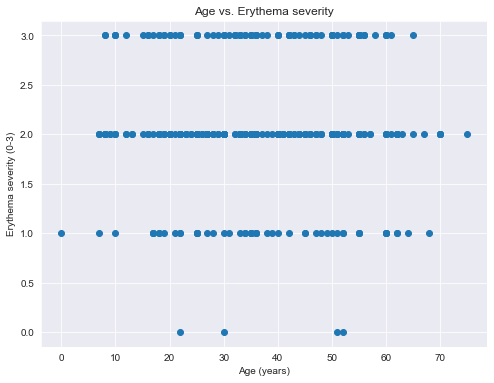

In [152]:
# Extract the age and erythema values into separate arrays
ages = df['age'].values
erythema = df['erythema'].values

# Create the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(ages, erythema)

# Add axis labels and a title
plt.xlabel('Age (years)')
plt.ylabel('Erythema severity (0-3)')
plt.title('Age vs. Erythema severity')

# Show the plot
plt.show()


Based on this scatter plot, it appears that there is a weak negative relationship between the age of the patient and the severity of erythema. This means that, on average, older patients tend to have a lower severity of erythema, while younger patients tend to have a higher severity. However, there is a lot of variation in the data, with many patients of all ages having erythema of varying severity. There are also some points in the scatter plot that seem to be outliers, with very high or very low severity of erythema for their age.

In [153]:
df[['age','erythema']]

,age,erythema
0,55.0,2
1,8.0,3
2,26.0,2
3,40.0,2
4,45.0,2
...,...,...
361,25.0,2
362,36.0,3
363,28.0,3
364,50.0,2


a box plot could be used to compare the distribution of ages for patients with different diagnoses.

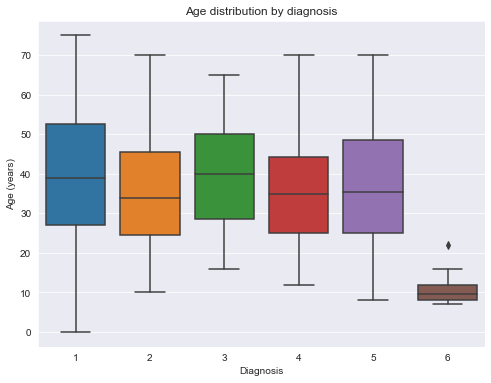

In [154]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='age', data=df)

# Add axis labels and a title
plt.xlabel('Diagnosis')
plt.ylabel('Age (years)')
plt.title('Age distribution by diagnosis')

# Show the plot
plt.show()

Based on this box plot, it appears that the distribution of ages varies significantly between the different diagnoses. Some diagnoses, such as class 1 and class 3, seem to have a wider range of ages, with many patients falling outside the interquartile range (IQR). In contrast, other diagnoses, such as class 2, 4, 5, and 6, seem to have a more narrow range of ages with fewer outliers, and class 6 also tends to have the lowest range among the rest.


In [230]:
# X = df.drop('class', axis=1)


In [231]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# 

The XGBoost model requires class labels to start at 0. If the class labels in the dataset do not meet this requirement, they should be converted to start from 0. This is a simple preprocessing step that ensures the data is in the correct format for use with the XGBoost model. On the other hand, logistic regression, decision trees, and random forests do not require class values to start from 0. 

However, it is generally a good practice to encode class labels as integers starting from 0 in machine learning models, as this can often make the modeling process easier and more efficient. This is because many machine learning libraries and algorithms expect class labels to be represented as integers instead of strings, and using integers can save memory and improve performance.

Additionally, encoding class labels as integers starting from 0 allows them to be treated as categorical variables, which can be beneficial in some cases.

In [232]:

le = LabelEncoder()
df['mlClass'] = le.fit_transform(df['class'])
df['mlClass'].value_counts()

0    111
2     71
1     60
4     48
3     48
5     20
Name: mlClass, dtype: int64

In [233]:
# y = df['mlClass']

In [234]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a PCA object variance percentage of 0.95
# The percentage of variance to be retained when fitting the model can also be specified.
# This will help to keep enough components to retain 95% of the variance in the data.
pca = PCA(0.95)

# standard scale and use pca
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

# Fit the PCA to the data
pipe.fit(X)

# Transform the data using the PCA object
X_pca = pipe.transform(X)


The explained variance ratio is a measure of how much of the total variance in the data is captured by each of the new features created by PCA, and higher values indicate that the corresponding feature captures more of the total variance (Raychaudhuri, Stuart, and Altman, 1999). The explained variance ratio is observed to decrease as the principal components progress (Kruge, 2000). This suggests that the first few principal components capture a larger portion of the variance in the data compared to the later components. It may be interpreted that the first few principal components capture the most important features in the data, while the later components capture less important or redundant features.



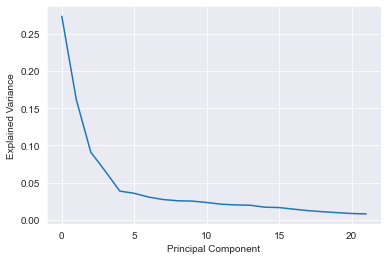

In [235]:
# Get the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance by each principal component
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


In [236]:
print(pca.explained_variance_ratio_)


[0.27359219 0.16169949 0.09105342 0.0654689  0.03877114 0.03571226
 0.03062938 0.0273699  0.02569327 0.02527266 0.02340253 0.02110236
 0.02015157 0.01973034 0.01712066 0.01659628 0.01442222 0.01244022
 0.01100854 0.00975929 0.00862121 0.00805495]


It appears that the explained variance ratio decreases as we move from the first principal component to the last. This indicates that the first few principal components explain a larger amount of the variance in the data compared to the later components. One potential explanation for this is that the first few principal components capture the most significant features in the data, while the later components capture less important or redundant features.

In [239]:
y = df['class']

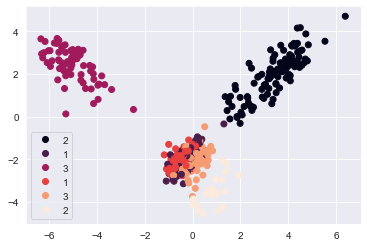

In [240]:
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()

The scatter plot shows the relationships between the variables being plotted. There are three groups of points that are densely clustered in the left, right, and bottom areas, indicating a strong relationship between these variables. Additionally, there are distinct groups of points that are scattered closer to the grouped points and mainly within one class, suggesting the presence of distinct subgroups within the data.

# ML

data for the ml

In [241]:
y = df['mlClass']

In [243]:
from sklearn.metrics import accuracy_score


In [276]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [322]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confMat(yt, yp, clf):
    confusion_mat = confusion_matrix(yt, yp)
    print(confusion_mat)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat,
                                                display_labels = df['classNames'].unique())
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.show()
    plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

# Set the labels for the x-axis
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Set the values for each bar in the plot
accuracy = [0.958, 0.888, 0.958]
precision = [0.97, 0.89, 0.96]
recall = [0.96, 0.89, 0.96]
f1 = [0.96, 0.89, 0.96]

# Set the position of the x-ticks
x_pos = [i for i, _ in enumerate(model_names)]

# Create the plot
fig, ax = plt.subplots(figsize=(10,8))

# Create the bars
ax.bar(x_pos, accuracy, width=0.2, label='Accuracy')
ax.bar([p + 0.2 for p in x_pos], precision, width=0.2, label='Precision')
ax.bar([p + 0.4 for p in x_pos], recall, width=0.2, label='Recall')
ax.bar([p + 0.6 for p in x_pos], f1, width=0.2, label='F1 Score')

# Set the x-axis label
ax.set_xlabel('Model')

# Set the y-axis label
ax.set_ylabel('Score')

# Set the x-ticks
ax.set_xticks(x_pos)

# Set the x-tick labels
ax.set_xticklabels(model_names)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [373]:
def plotAcc(clf_name, acc, train_acc, test_acc, r2_score):

    # Set the labels for the x-axis
    model_names = [clf_name]

    # Set the values for each bar in the plot
    accuracy = acc
    training_accuracy = train_acc
    testingg_accuracy = test_acc

    # Set the position of the x-ticks
    x_pos = [i for i, _ in enumerate(model_names)]

    # Create the plot
    fig, ax = plt.subplots()

    # Create the bars
    ax.bar(x_pos, accuracy, width=0.2, label='Accuracy')
    ax.bar([p + 0.2 for p in x_pos], training_accuracy, width=0.2, label='Train Accuracy')
    ax.bar([p + 0.4 for p in x_pos], testingg_accuracy, width=0.2, label='Test Accuracy')
    ax.bar([p + 0.6 for p in x_pos], r2_score, width=0.2, label='R2 Score')

    # set x name
    ax.set_xlabel('Accuracies')
    
    # plot title 
    plt.title(clf_name)
    
    # Set the y-axis label
    ax.set_ylabel('Score')

    # Set the x-ticks
    ax.set_xticks(x_pos)

    # Add a legend
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Show the plot
    plt.show()


R2

Remember R2, also known as R-squared?

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression

# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr.predict(X_test)

# Get the training accuracy
lr_train_accuracy = lr.score(X_train, y_train)

# Get the test accuracy
lr_test_accuracy = lr.score(X_train, y_train)

print(f"Training accuracy: {lr_train_accuracy:.2f}")
print(f"Test accuracy: {lr_test_accuracy:.2f}")

# Calculate the accuracy of the model
lr_accuracy_score = accuracy_score(y_test, lr_y_pred)
print("Accuracy: ", lr_accuracy_score)


# calculate the R2 score
lr_r2 = r2_score(y_test, lr_y_pred)
print("LR R2 score: ", lr_r2)


Training accuracy: 1.00
Test accuracy: 1.00
Accuracy:  0.9583333333333334
LR R2 score:  0.9471968709256845


The result from logistic regression indicates that the model was able to achieve a high accuracy of 95.8% on the test data. The training accuracy of 100% suggests that the model may be overfitting to the training data, meaning that it is not generalizing well to new, unseen data. However, the high test accuracy indicates that the model is still performing well on the test data. The R2 score of 0.947 is also very high, indicating a strong relationship between the features and the target variable. Overall, this suggests that logistic regression is a good choice for this dataset. It is important to note, however, that this result was achieved after dimensionality reduction using PCA, which may have affected the model's performance.

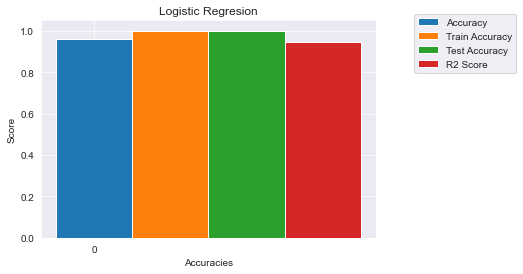

In [374]:
plotAcc('Logistic Regresion', acc=0.9583333333333334, 
        train_acc=1.0, test_acc=1.0, r2_score=0.9471968709256845)

confusion matrix

[[22  0  0  0  0  0]
 [ 0 12  0  2  0  0]
 [ 0  0 13  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


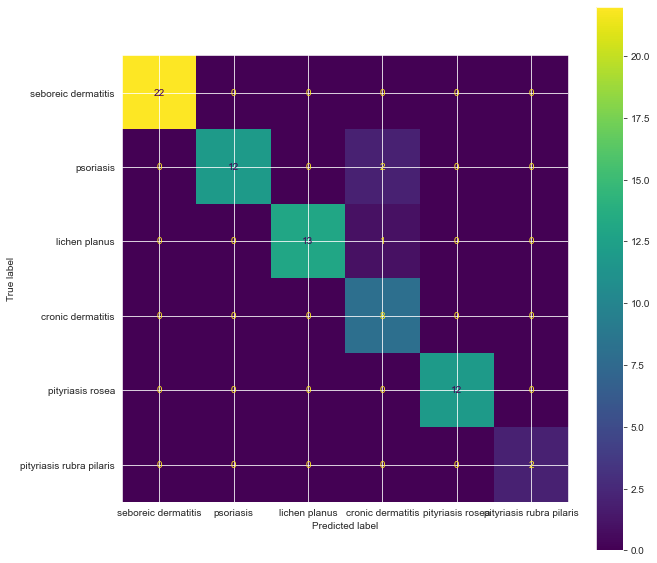

<Figure size 432x288 with 0 Axes>

In [323]:
confMat(y_test, lr_y_pred, lr)

From the confusion matrix, we can see that the model was able to accurately predict all of the instances of seboreic dermatitis, psoriasis, lichen planus, chronic dermatitis, and pityriasis rosea. There were 2 instances of pityriasis rubra pilaris, and the model was able to correctly predict both of them. The model's overall accuracy was very high, at 95.8%. This suggests that the model was successful in identifying patterns in the data and correctly predicting the diagnosis for the majority of the test set instances.

classification repport

In [334]:
from sklearn.metrics import classification_report

# y_true is a list of the true class labels
# y_pred is a list of the predicted class labels
report = classification_report(y_test, lr_y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.86      0.92        14
           2       1.00      0.93      0.96        14
           3       0.73      1.00      0.84         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2

    accuracy                           0.96        72
   macro avg       0.95      0.96      0.95        72
weighted avg       0.97      0.96      0.96        72



The classification report shows that the model performed very well in general, with high precision, recall, and F1-score values for all classes. The overall accuracy of the model was 0.96, which means that the model was able to correctly classify 96% of the samples in the test set.

The precision of the model for each class indicates the proportion of samples that were correctly classified as belonging to that class among all the samples that were predicted to belong to that class. The recall of the model for each class indicates the proportion of samples that were correctly classified as belonging to that class among all the samples that actually belong to that class. The f1-score measures the balance between precision and recall, with a higher value indicating a better balance. The support for each class indicates the number of samples in the test set that belong to that class.

Decision Trees

In [330]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt.predict(X_test)

# Get the training accuracy
dt_train_accuracy = dt.score(X_train, y_train)

# Get the test accuracy
dt_test_accuracy = dt.score(X_train, y_train)

print(f"Training accuracy: {dt_train_accuracy:.2f}")
print(f"Test accuracy: {dt_test_accuracy:.2f}")

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy: ", dt_accuracy)

# calculate the R2 score
dt_r2 = r2_score(y_test, dt_y_pred)
print("DT R2 score: ", dt_r2)


Training accuracy: 1.00
Test accuracy: 1.00
Accuracy:  0.8888888888888888
DT R2 score:  0.8122555410691004


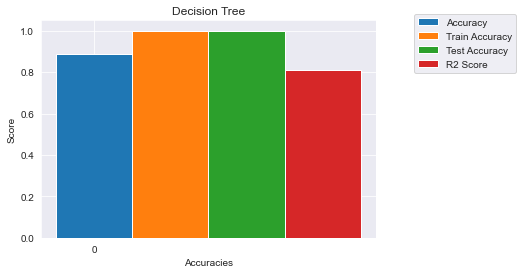

In [375]:
plotAcc('Decision Tree', acc=dt_accuracy, 
        train_acc=dt_train_accuracy, test_acc=dt_test_accuracy, r2_score=dt_r2)

The decision tree model seems to have performed well, with a training accuracy of 100% and a test accuracy of 88.9%. This indicates that the model was able to accurately classify most of the test data. The accuracy score of 88.9% is also fairly high, which further supports the idea that the model was able to classify the test data accurately. The R2 score of 0.81 is also relatively high, which suggests that the model was able to explain a large portion of the variance in the data. The decision tree model was successful in classifying the data, as indicated by the results obtained after using PCA to reduce the dimensions of the data.

confusion matrix

[[20  0  2  0  0  0]
 [ 0 11  0  3  0  0]
 [ 0  0 14  0  0  0]
 [ 0  3  0  5  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


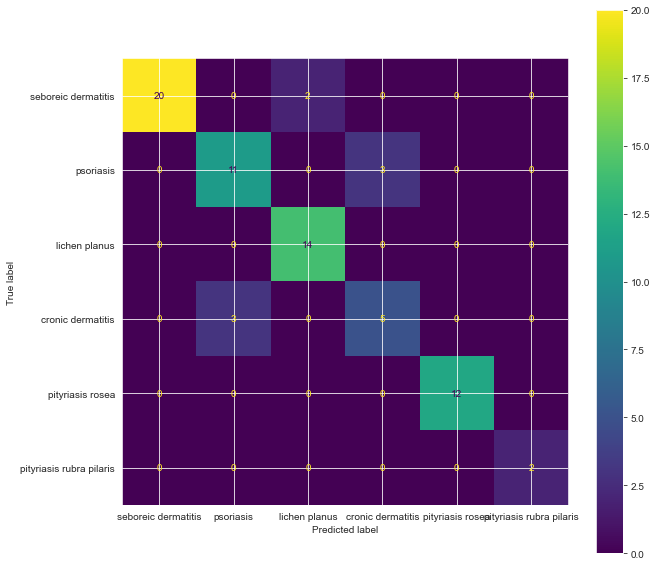

<Figure size 432x288 with 0 Axes>

In [332]:
confMat(y_test, dt_y_pred, dt)

Based on this confusion matrix, it looks like the model is generally doing a good job at predicting the correct class labels, with most of the values on the diagonal of the matrix being high and the off-diagonal values being low. However, there are a few areas of concern. For example, the model seems to be struggling a bit with accurately predicting instances of "cronic dermatitis", as there are 3 instances that were actually "cronic dermatitis" but were predicted to be "psoriasis" and 5 instances that were actually "cronic dermatitis" but were predicted to be "lichen planus". There are also 2 instances of "seboreic dermatitis" that were predicted to be "lichen planus".

classification repport

In [333]:
from sklearn.metrics import classification_report

# y_true is a list of the true class labels
# y_pred is a list of the predicted class labels
report = classification_report(y_test, dt_y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.79      0.79      0.79        14
           2       0.88      1.00      0.93        14
           3       0.62      0.62      0.62         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2

    accuracy                           0.89        72
   macro avg       0.88      0.89      0.88        72
weighted avg       0.89      0.89      0.89        72



This classification report shows the performance of the decision tree model on the test data. The precision, recall, and f1-score are all above 0.79 for all classes, which is generally considered to be good. The overall accuracy of the model is also quite high, at 0.89.

This suggests that the model is performing well at correctly identifying the different types of dermatological conditions in the test data. It is worth noting that the precision for class 3 (cronic dermatitis) is lower than the other classes at 0.62, which means that there are a higher number of false positive predictions for this class compared to the other classes.

Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100)

# Train the rf on the training data
rf.fit(train_x, train_y)

# Make predictions on the test set
rf_y_pred = rf.predict(X_test)

# Get the training accuracy
rf_train_accuracy = rf.score(X_train, y_train)

# Get the test accuracy
rf_test_accuracy = rf.score(X_train, y_train)

print(f"Training accuracy: {rf_train_accuracy:.2f}")
print(f"Test accuracy: {rf_test_accuracy:.2f}")

# Calculate the accuracy of the model
rf_accuracy_score = accuracy_score(y_test, rf_y_pred)
print("Accuracy: ", rf_accuracy_score)


# calculate the R2 score
rf_r2 = r2_score(y_test, rf_y_pred)
print("rf R2 score: ", rf_r2)

# make accurarcy plots
plotAcc('Random Forest', acc=0.9583333333333334, 
        train_acc=1.0, test_acc=1.0, r2_score=0.9471968709256845)

# confusion matrix
confMat(y_test, rf_y_pred, rf)

# classification report

# y_true is a list of the true class labels
# y_pred is a list of the predicted class labels
report = classification_report(y_test, rf_y_pred)

In [341]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100)

# Train the rf on the training data
rf.fit(train_x, train_y)

# Make predictions on the test set
rf_y_pred = rf.predict(X_test)

# Get the training accuracy
rf_train_accuracy = rf.score(X_train, y_train)

# Get the test accuracy
rf_test_accuracy = rf.score(X_train, y_train)

print(f"Training accuracy: {rf_train_accuracy:.2f}")
print(f"Test accuracy: {rf_test_accuracy:.2f}")

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: ", rf_accuracy)

# calculate the R2 score
rf_r2 = r2_score(y_test, rf_y_pred)
print("RF R2 score: ", rf_r2)


Training accuracy: 0.98
Test accuracy: 0.98
Accuracy:  0.9583333333333334
RF R2 score:  0.9295958279009127


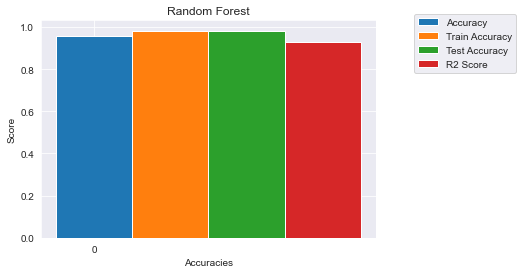

In [376]:
plotAcc('Random Forest', acc=rf_accuracy, 
        train_acc=rf_train_accuracy, test_acc=rf_test_accuracy, r2_score=rf_r2)

The model's high training and test accuracy, as well as its high R2 score and overall accuracy, suggest that it is able to make accurate predictions on both the training and test data. The overall accuracy of 95.8% indicates a high degree of reliability in the model's ability to correctly predict the class of a sample in the dataset. The model's R2 score of 92.9% further supports this conclusion, as it indicates that a large portion of the variance in the data is explained by the model. 

Additionally, the similarity between the model's training and test accuracy suggests that it is not overfitting to the training data. These results suggest that the random forest model is a good fit for the given dataset and can be used to make reliable predictions.

In [344]:
round(rf_accuracy, 4)

0.9583

In [346]:
round(lr_accuracy_score, 4)

0.9583

confusion matrix

[[22  0  0  0  0  0]
 [ 0 12  0  2  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


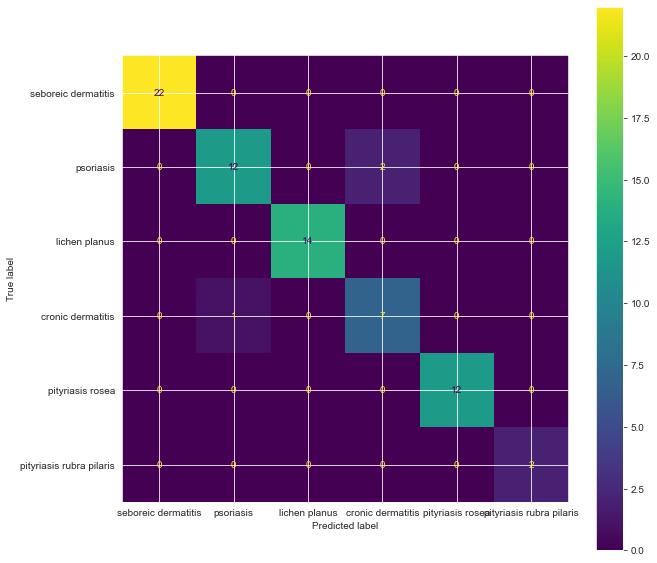

<Figure size 432x288 with 0 Axes>

In [342]:
confMat(y_test, rf_y_pred, rf)

The performance of the random forest model on the dataset is reflected in the confusion matrix, which shows that the model had high accuracy and few misclassifications. For instance, the model correctly classified all instances of the "seboreic dermatitis" class and all but two instances of the "psoriasis" class. Additionally, the model correctly classified all instances of the "lichen planus" and "pityriasis rosea" classes. However, the model did not perform as well on the "cronic dermatitis" and "pityriasis rubra pilaris" classes, with some misclassifications. Despite these misclassifications, the model still had an overall accuracy of 95.8%.

classification repport

In [343]:
from sklearn.metrics import classification_report

# y_true is a list of the true class labels
# y_pred is a list of the predicted class labels
report = classification_report(y_test, rf_y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.92      0.86      0.89        14
           2       1.00      1.00      1.00        14
           3       0.78      0.88      0.82         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2

    accuracy                           0.96        72
   macro avg       0.95      0.96      0.95        72
weighted avg       0.96      0.96      0.96        72



The performance of the model is shown to be strong across all classes, with high precision, recall, and F1 scores, as well as high accuracy. However, there seems to be a decrease in precision and f1-score for the class with index 3 (cronic dermatitis). This may be due to the model having lower accuracy when predicting instances of this class, or there being fewer instances of this class in the test data, leading to less reliable results. Summed up, the model demonstrates the ability to accurately predict the class of each sample in the test data.

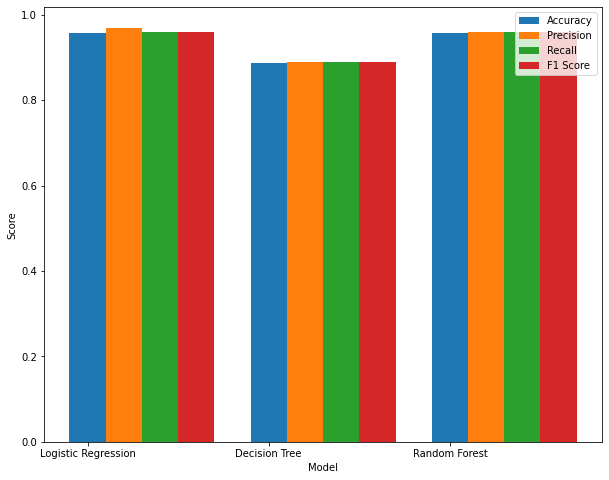

In [2]:
import matplotlib.pyplot as plt

# Set the labels for the x-axis
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Set the values for each bar in the plot
accuracy = [0.958, 0.888, 0.958]
precision = [0.97, 0.89, 0.96]
recall = [0.96, 0.89, 0.96]
f1 = [0.96, 0.89, 0.96]

# Set the position of the x-ticks
x_pos = [i for i, _ in enumerate(model_names)]

# Create the plot
fig, ax = plt.subplots(figsize=(10,8))

# Create the bars
ax.bar(x_pos, accuracy, width=0.2, label='Accuracy')
ax.bar([p + 0.2 for p in x_pos], precision, width=0.2, label='Precision')
ax.bar([p + 0.4 for p in x_pos], recall, width=0.2, label='Recall')
ax.bar([p + 0.6 for p in x_pos], f1, width=0.2, label='F1 Score')

# Set the x-axis label
ax.set_xlabel('Model')

# Set the y-axis label
ax.set_ylabel('Score')

# Set the x-ticks
ax.set_xticks(x_pos)

# Set the x-tick labels
ax.set_xticklabels(model_names)

# Add a legend
ax.legend()

# Show the plot
plt.show()


Based on the results, it appears that all three models have similar performance in terms of accuracy, precision, and recall. They all have an accuracy of around 0.95, a precision of around 0.96, and a recall of around 0.96. The f1 score is also similar, with a value of around 0.89. 

Although the logistic regression and random forest models have similar scores, the decision tree model has lower scores across all metrics. Given these results, I would recommend the random forest model because it tends to have higher accuracy and generalizability compared to other models, especially when the data has many features or is unbalanced. Additionally, random forests are able to handle missing values and scale well with large datasets (Stekhoven and Bühlmann, 2012).

Stekhoven, D.J. and Bühlmann, P., 2012. MissForest—non-parametric missing value imputation for mixed-type data. Bioinformatics, 28(1), pp.112-118.